In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [37]:
# Loading the data into pandas DataFrame.
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [38]:
# Data Overview.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

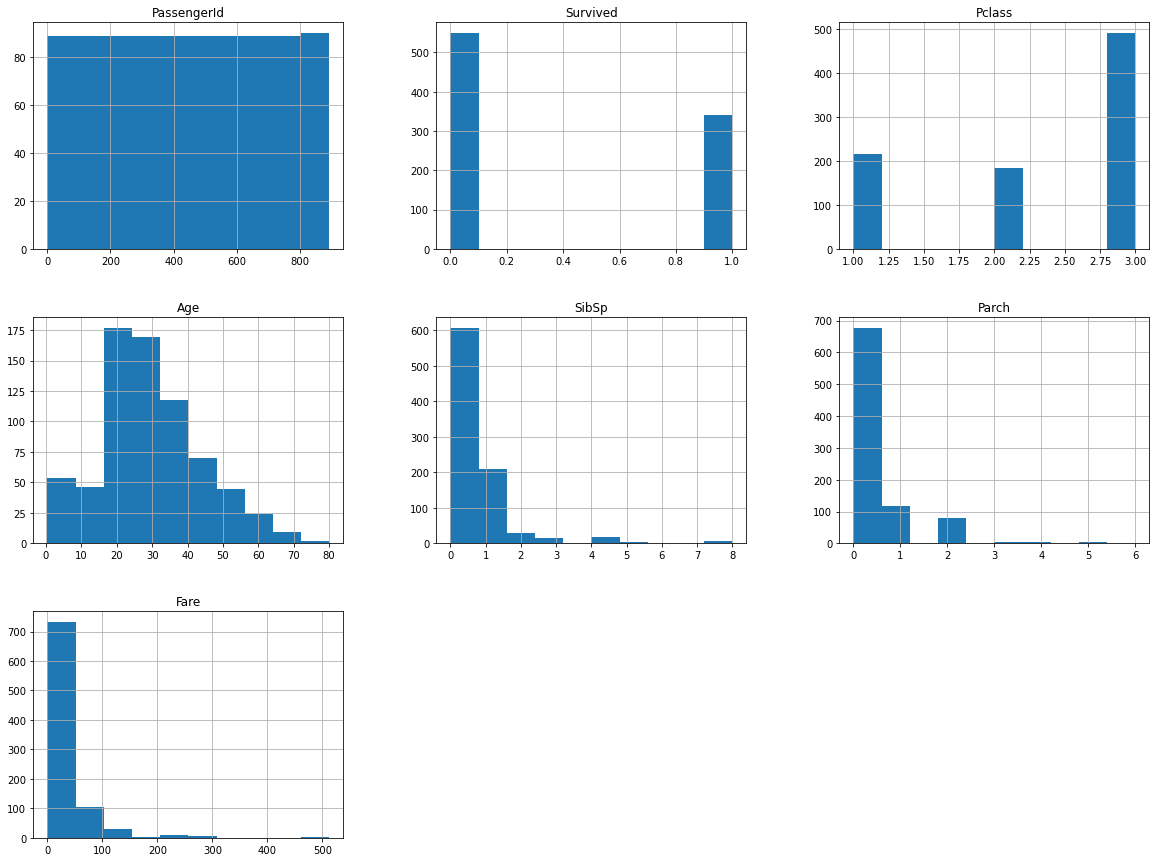

In [42]:
train.hist(figsize=(20,15))

In [43]:
corr_matrix=train.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [44]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [45]:
from pandas.plotting import scatter_matrix
attributes=["Survived","Fare","Parch","Age","Pclass"]

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Parch'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSub

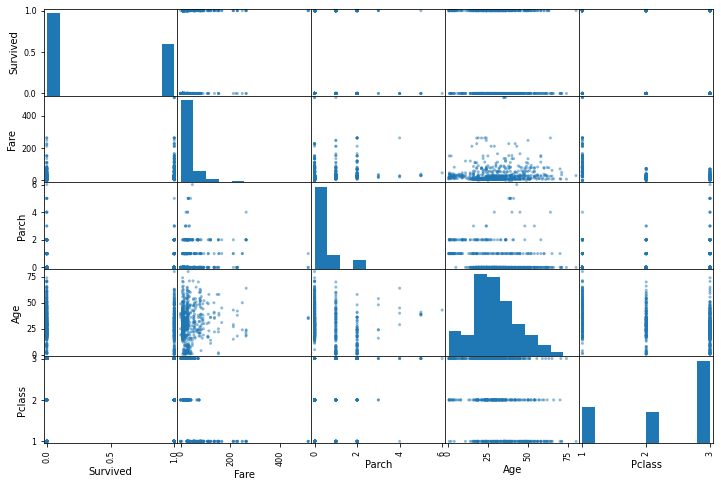

In [46]:
scatter_matrix(train[attributes],figsize=(12,8))

<AxesSubplot:>

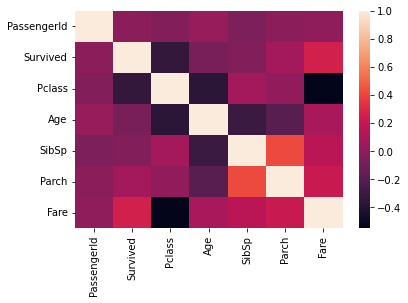

In [47]:
import seaborn as sns
sns.heatmap(corr_matrix)

In [48]:
train.pivot_table(index='Survived',values=['Fare','Parch','Age','Pclass'])

,Age,Fare,Parch,Pclass
Survived,,,,
0,30.626179,22.117887,0.329690,2.531876
1,28.343690,48.395408,0.464912,1.950292


Here we see that people who pays more and people of high class has better survival ratio. And also they tend to have their family members with them.

In [49]:
chart=train[['Sex','Age','Fare','Pclass','Embarked','Cabin','Survived']]

In [50]:
for col in chart.columns:
    print(chart[col].value_counts())

male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


We see that Number of Males are quite high and Number of Third class people are significantly high.

In [51]:
# Comparing 
pd.pivot_table(train,index='Survived',columns='Pclass',values='Ticket',aggfunc='count') 

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


We see that the survival ratio of high class people is significantly high compared to low class. 

In [52]:
pd.pivot_table(train,index='Survived',columns='Sex',values='Ticket',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


Survival rate of females are significantly higher.

In [53]:
pd.pivot_table(train,columns='Embarked',index='Survived',aggfunc='count',values='Ticket')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


People who were embarked from Cherbourg has little high survival ratio. (They most have been from High Class or Females.

In [54]:
# Data Cleaning
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
train=train.drop(columns='Cabin')

In [56]:
train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [57]:
# pipeline for numerical attributes.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [58]:
num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

In [59]:
# Pipeline for categorial attributes
from sklearn.preprocessing import OneHotEncoder

In [60]:
cat_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("cat_encoder",OneHotEncoder(sparse=False)),
])

In [61]:
from sklearn.compose import ColumnTransformer
num_att=["Age","Parch","Fare"]
cat_att=["Sex","Pclass","Embarked"]

In [62]:
pipeline=ColumnTransformer([
    ("num",num_pipeline,num_att),
    ("cat",cat_pipeline,cat_att),
])

In [64]:
X_train=pipeline.fit_transform(train[num_att+cat_att])

In [65]:
X_train[:4]

array([[-0.56573646, -0.47367361, -0.50244517,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.66386103, -0.47367361,  0.78684529,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.25833709, -0.47367361, -0.48885426,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.4333115 , -0.47367361,  0.42073024,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [70]:
# For test data.
X_test=pipeline.transform(test[num_att+cat_att])

In [67]:
y_train=train["Survived"]

In [68]:
# Training a RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

In [69]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_hat=rf.predict(X_test)

In [74]:
y_hat[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [76]:
from sklearn.model_selection import cross_val_score
rfscore=cross_val_score(rf,X_train,y_train,cv=10)
rfscore.mean()

0.8137453183520599